# Explore here

In [2]:
!pip install numpy
!pip install pandas
!pip install scikit-learn
!pip install matplotlib
!pip install seaborn


Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.3/16.3 MB 37.9 MB/s eta 0:00:0000:0100:01

[notice] A new release of pip is available: 23.0.1 -> 24.2
[notice] To update, run: pip install --upgrade pip
Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.0/13.0 MB 48.0 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 505.5/505.5 kB 16.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 345.4/345.4 kB 13.4 MB/s eta 0:00:00

[notice] A new release of pip is available: 23.0.1 -> 24.2
[notice] To update, run: pip install --upgrade pip
Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.4/13.4 MB 44.5 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.2/41.2 MB 13.9 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━

In [20]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score
from sklearn import tree
import matplotlib.pyplot as plt
from pandas.plotting import parallel_coordinates
from sklearn.ensemble import RandomForestClassifier
from pickle import dump

In [4]:
url = "https://raw.githubusercontent.com/4GeeksAcademy/decision-tree-project-tutorial/main/diabetes.csv"
data = pd.read_csv(url)

data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
data.info

<bound method DataFrame.info of      Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   5

In [6]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [9]:
X = data.drop("Outcome", axis = 1)
y = data["Outcome"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

X_train.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
60,2,84,0,0,0,0.0,0.304,21
618,9,112,82,24,0,28.2,1.282,50
346,1,139,46,19,83,28.7,0.654,22
294,0,161,50,0,0,21.9,0.254,65
231,6,134,80,37,370,46.2,0.238,46


In [14]:
model = RandomForestClassifier(random_state = 42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

[Text(0.4527730855855856, 0.9642857142857143, 'BMI <= 29.15\ngini = 0.449\nsamples = 383\nvalue = [405, 209]\nclass = 0'),
 Text(0.17004504504504506, 0.8928571428571429, 'DiabetesPedigreeFunction <= 1.12\ngini = 0.186\nsamples = 150\nvalue = [224, 26]\nclass = 0'),
 Text(0.3114090653153153, 0.9285714285714286, 'True  '),
 Text(0.08783783783783784, 0.8214285714285714, 'Age <= 27.5\ngini = 0.165\nsamples = 144\nvalue = [220, 22]\nclass = 0'),
 Text(0.018018018018018018, 0.75, 'BMI <= 22.75\ngini = 0.041\nsamples = 82\nvalue = [142, 3]\nclass = 0'),
 Text(0.009009009009009009, 0.6785714285714286, 'gini = 0.0\nsamples = 25\nvalue = [51, 0]\nclass = 0'),
 Text(0.02702702702702703, 0.6785714285714286, 'DiabetesPedigreeFunction <= 0.396\ngini = 0.062\nsamples = 57\nvalue = [91.0, 3.0]\nclass = 0'),
 Text(0.018018018018018018, 0.6071428571428571, 'gini = 0.0\nsamples = 34\nvalue = [54, 0]\nclass = 0'),
 Text(0.036036036036036036, 0.6071428571428571, 'DiabetesPedigreeFunction <= 0.405\ngini = 0

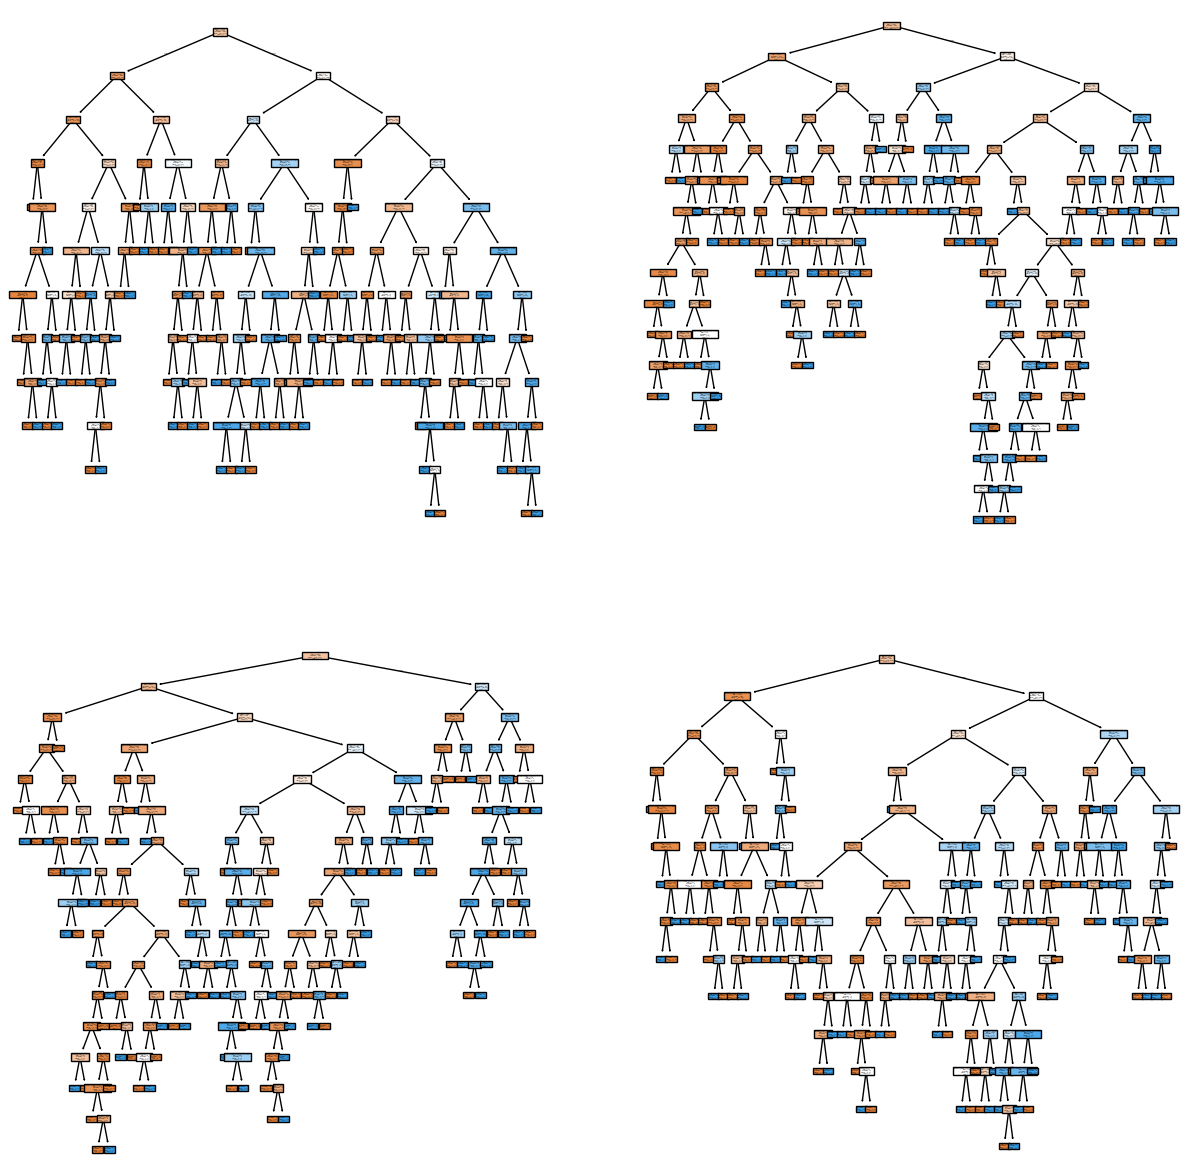

In [17]:
fig, axis = plt.subplots(2, 2, figsize = (15, 15))

# We show the first 4 trees out of the 100 generated (default)
tree.plot_tree(model.estimators_[0], ax = axis[0, 0], feature_names = list(X_train.columns), class_names = ["0", "1", "2"], filled = True)
tree.plot_tree(model.estimators_[1], ax = axis[0, 1], feature_names = list(X_train.columns), class_names = ["0", "1", "2"], filled = True)
tree.plot_tree(model.estimators_[2], ax = axis[1, 0], feature_names = list(X_train.columns), class_names = ["0", "1", "2"], filled = True)
tree.plot_tree(model.estimators_[3], ax = axis[1, 1], feature_names = list(X_train.columns), class_names = ["0", "1"], filled = True)

In [23]:
y_train_pred = model.predict(X_train)
y_train_pred


array([0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0,

In [18]:
y_pred = model.predict(X_test)
y_pred

array([0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0])

In [25]:
accuracy_score(y_train,y_train_pred)

1.0

In [24]:
accuracy_score(y_test, y_pred)

0.7207792207792207

In [27]:
f1_score(y_test, y_pred)

np.float64(0.6126126126126126)

In [52]:
# Set up grid search
param_grid = {
     'n_estimators':[20,50],
     'max_depth':[3,4,5],
     'min_samples_leaf':[1,2,3,4,5],
     'min_samples_split':[2,3,4,5],
     'max_features':[3,4,5,6,7]
}

# Perform grid search
rand_search = GridSearchCV(RandomForestClassifier(n_jobs= -1),param_grid, cv=3)
rand_out = rand_search.fit(X_train, y_train)
#rand_search.fit(X_train, y_train)

# Print best parameters
print(f"Best Parameters: {rand_search.best_params_}")

Best Parameters: {'max_depth': 5, 'max_features': 5, 'min_samples_leaf': 3, 'min_samples_split': 3, 'n_estimators': 50}


/home/vscode/.local/lib/python3.10/site-packages/numpy/ma/core.py:2881: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


In [53]:
best = rand_out.best_estimator_

best

RandomForestClassifier(max_depth=5, max_features=5, min_samples_leaf=3,
                       min_samples_split=3, n_estimators=50, n_jobs=-1)

In [54]:
y_train_pred = best.predict(X_train)
y_test_pred = best.predict(X_test)


In [55]:
accuracy_score(y_train,y_train_pred)


0.8631921824104235

In [56]:
accuracy_score(y_test, y_test_pred)

0.7662337662337663

In [57]:
f1_score(y_test, y_test_pred)

np.float64(0.6727272727272727)

In [58]:
f1_score(y_train, y_train_pred)

np.float64(0.7910447761194029)

[Text(0.5955882352941176, 0.9166666666666666, 'Glucose <= 154.5\ngini = 0.469\nsamples = 381\nvalue = [384.0, 230.0]\nclass = 0'),
 Text(0.3235294117647059, 0.75, 'Age <= 28.5\ngini = 0.407\nsamples = 318\nvalue = [360, 143]\nclass = 0'),
 Text(0.4595588235294118, 0.8333333333333333, 'True  '),
 Text(0.19117647058823528, 0.5833333333333334, 'BMI <= 41.8\ngini = 0.252\nsamples = 166\nvalue = [225, 39]\nclass = 0'),
 Text(0.11764705882352941, 0.4166666666666667, 'BMI <= 30.45\ngini = 0.194\nsamples = 157\nvalue = [221, 27]\nclass = 0'),
 Text(0.058823529411764705, 0.25, 'Glucose <= 138.0\ngini = 0.058\nsamples = 84\nvalue = [129, 4]\nclass = 0'),
 Text(0.029411764705882353, 0.08333333333333333, 'gini = 0.017\nsamples = 75\nvalue = [119, 1]\nclass = 0'),
 Text(0.08823529411764706, 0.08333333333333333, 'gini = 0.355\nsamples = 9\nvalue = [10, 3]\nclass = 0'),
 Text(0.17647058823529413, 0.25, 'DiabetesPedigreeFunction <= 0.609\ngini = 0.32\nsamples = 73\nvalue = [92, 23]\nclass = 0'),
 Text

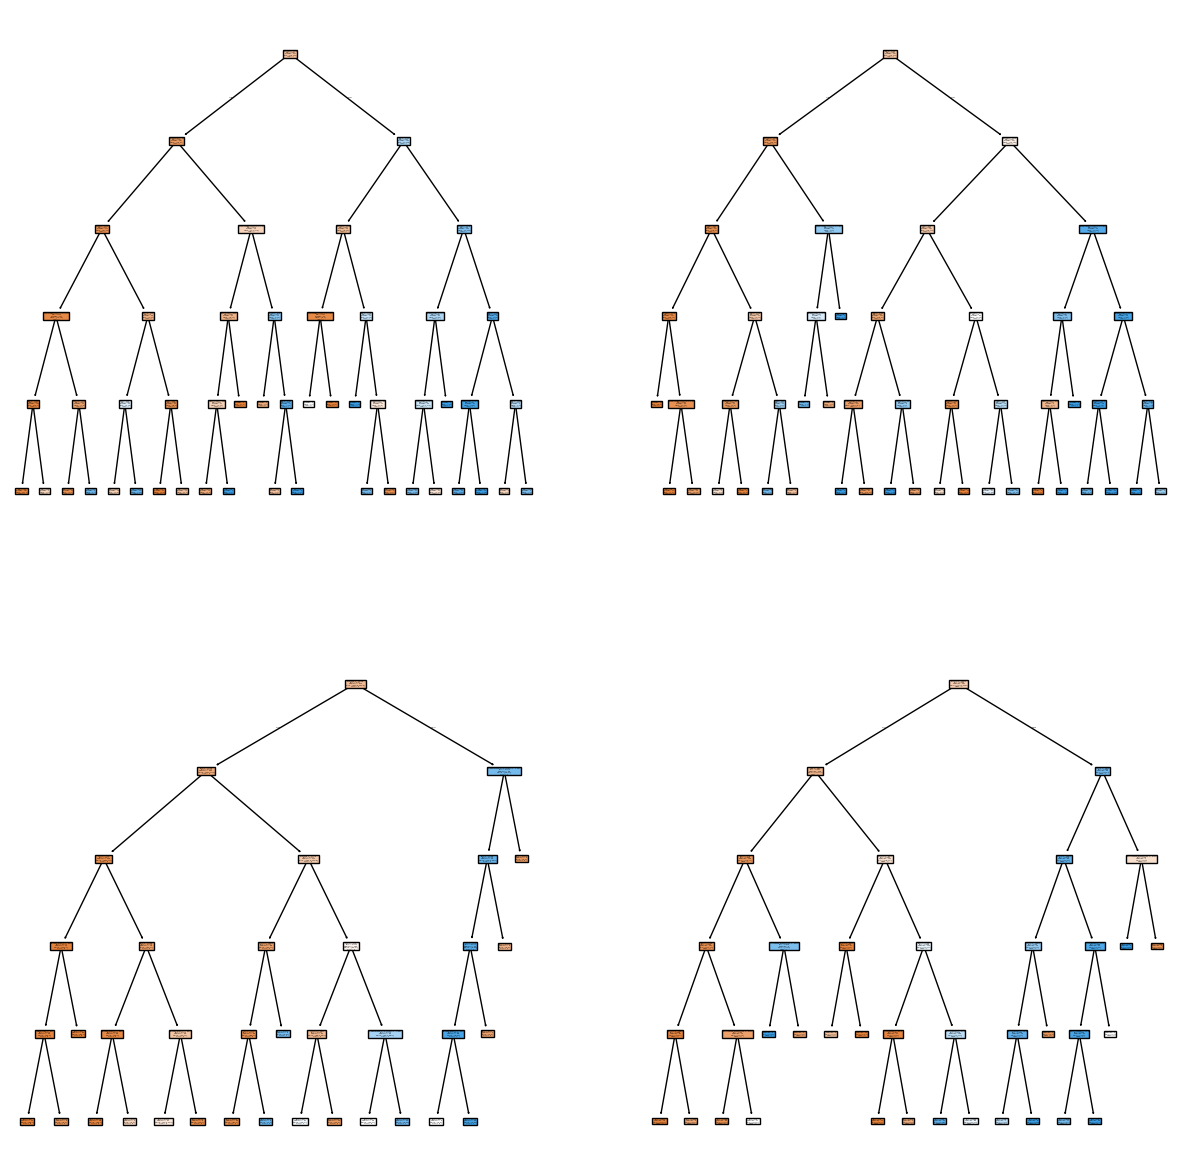

In [59]:
fig, axis = plt.subplots(2, 2, figsize = (15, 15))

# We show the first 4 trees out of the 100 generated (default)
tree.plot_tree(best.estimators_[0], ax = axis[0, 0], feature_names = list(X_train.columns), class_names = ["0", "1", "2"], filled = True)
tree.plot_tree(best.estimators_[1], ax = axis[0, 1], feature_names = list(X_train.columns), class_names = ["0", "1", "2"], filled = True)
tree.plot_tree(best.estimators_[2], ax = axis[1, 0], feature_names = list(X_train.columns), class_names = ["0", "1", "2"], filled = True)
tree.plot_tree(best.estimators_[3], ax = axis[1, 1], feature_names = list(X_train.columns), class_names = ["0", "1"], filled = True)

In [61]:
dump(model, open("random_forest_classifier_default_42.sav", "wb"))